In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

In [ ]:
#   File Beer Profiles and ratings.csv
#   --------------------------------------

# This file contains 1 Tabs  with Beer dateset detailled profile and ratings info
    #   Name	Style	Brewery	Beer Name (Full)	Description	ABV	Min IBU	Max IBU	Astringency	Body	Alcohol	Bitter	Sweet	Sour	Salty	Fruits	Hoppy	Spices	Malty	review_aroma	review_appearance	review_palate	review_taste	review_overall	number_of_reviews



In [3]:
# Fetch raw data

rawdata = pd.read_csv(r'C:\Users\t.vincotte\Documents\CODE\TFE\EoF - Work\Beer_Profile\Source_Files\beer_data_set.csv') 
 

In [4]:
#rawdata.info()
str = rawdata.info()
structure = pd.DataFrame(str)  #  ne met pas en dataframe
structure
# structure.to_excel("Beer_datasets_structures",sheet_name='Beer data set details') # n ecrit pas le rawdata.info dans le fichier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

""


In [19]:
rawdata.head(1)

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111


In [21]:
rawdata.Description[0]

'Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored "alt" style beer notably well balanced.\t'

TIME SERIES with reviews

In [5]:
#   Split dataset

cont_float_feature=rawdata.select_dtypes(float)
cont_int_features=rawdata.select_dtypes(int)
cat_feature= rawdata.select_dtypes(object)
cat_feature


,Name,Style,Brewery,Description
0,Amber,Altbier,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit..."
1,Double Bag,Altbier,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al..."
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei,Notes:
4,Scurry,Altbier,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...
...,...,...,...,...
5553,Red Nose Winter Ale,Winter Warmer,Natty Greene's Pub & Brewing Co.,Notes:
5554,Our Special Ale 2019 (Anchor Christmas Ale),Winter Warmer,Anchor Brewing Company,Notes:This is the forty-fifth annual Our Speci...
5555,Fish Tale Winterfish,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Notes:
5556,"He'Brew Hanukkah, Chanukah: Pass The Beer",Winter Warmer,Shmaltz Brewing Company,Notes:Chanukah Beer pours a rich crystal clear...


In [8]:
for col in cat_feature.columns:
    display(col)
    print('----------------')
    display(cat_feature[col].unique())
    display(cat_feature[col].value_counts())




'Name'

----------------


array(['Amber', 'Double Bag', 'Long Trail Ale', ...,
       'Fish Tale Winterfish',
       "He'Brew Hanukkah, Chanukah: Pass The Beer",
       'Frosted Frog Christmas Ale - Barrel-Aged'], dtype=object)

Name
Oktoberfest                                    15
Porter                                         12
Roggenbier                                     11
Smoked Porter                                  11
Brut IPA                                        8
                                               ..
Red Nose Winter Ale                             1
Our Special Ale 2019 (Anchor Christmas Ale)     1
Fish Tale Winterfish                            1
He'Brew Hanukkah, Chanukah: Pass The Beer       1
Nutcracker Winter Warmer Ale                    1
Name: count, Length: 5317, dtype: int64

'Style'

----------------


array(['Altbier', 'Barleywine - American', 'Barleywine - English',
       'Bitter - English Extra Special / Strong Bitter (ESB)',
       'Bitter - English', 'Bière de Champagne / Bière Brut',
       'Blonde Ale - American', 'Blonde Ale - Belgian',
       'Bock - Doppelbock', 'Bock - Eisbock', 'Bock - Maibock',
       'Bock - Traditional', 'Bock - Weizenbock', 'Braggot', 'Brett Beer',
       'Brown Ale - American', 'Brown Ale - Belgian Dark',
       'Brown Ale - English', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel',
       'Farmhouse Ale - Bière de Garde', 'Farmhouse Ale - Sahti',
       'Farmhouse Ale - Saison', 'Fruit and Field Beer',
       'Gruit / Ancient Herbed Ale', 'Happoshu', 'Herb and Spice Beer',
       'IPA - American', 'IPA - Belgian',
       'IPA - Black / Cascadian Dark Ale', 'IPA - Brut', 'IPA - English',
       'IPA - Imperial', 'IPA - New England', 'Kvass', 'Kölsch',
       'Lager - Adjunct', 'Lager - American Amber / Red',
       'Lage

Style
Altbier                                                 50
Barleywine - American                                   50
Barleywine - English                                    50
Bitter - English Extra Special / Strong Bitter (ESB)    50
Bitter - English                                        50
                                                        ..
Sour - Flanders Oud Bruin                               49
Sour - Berliner Weisse                                  49
Sour - Flanders Red Ale                                 49
Wild Ale                                                49
Lambic - Faro                                           16
Name: count, Length: 112, dtype: int64

'Brewery'

----------------


array(['Alaskan Brewing Co.', 'Long Trail Brewing Co.',
       'Uerige Obergärige Hausbrauerei', ..., 'Russell Brewing Company',
       'Aslin Beer Company', 'Stony Creek Brewery'], dtype=object)

Brewery
Boston Beer Company (Samuel Adams)    81
Anheuser-Busch                        49
Dogfish Head Craft Brewery            41
3 Floyds Brewing Co.                  40
Short's Brewing Company               36
                                      ..
Thunderhead Brewing Company            1
Piney River Brewing Co.                1
Carson's Brewery                       1
Wild Rose Brewery & Taproom            1
3 Nations Brewing Co.                  1
Name: count, Length: 1498, dtype: int64

'Description'

----------------


array(['Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored "alt" style beer notably well balanced.\t',
       'Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t',
       'Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast

Description
Notes:                                                                                                                                                                                                                                                                                                                                                                                                                          2196
Notes:21 IBU\t                                                                                                                                                                                                                                                                                                                                                                                                                     3
Notes:20 IBU\t                                                                                                                                    

Outcome of unique and value counts
-----------------------------------

Full name and description - leaf level
Analysis possible per name (label), style, brewery



In [9]:
cont_float_feature.info()
cont_int_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ABV         5558 non-null   float64
 1   Ave Rating  5558 non-null   float64
dtypes: float64(2)
memory usage: 87.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   key          5558 non-null   int64
 1   Style Key    5558 non-null   int64
 2   Min IBU      5558 non-null   int64
 3   Max IBU      5558 non-null   int64
 4   Astringency  5558 non-null   int64
 5   Body         5558 non-null   int64
 6   Alcohol      5558 non-null   int64
 7   Bitter       5558 non-null   int64
 8   Sweet        5558 non-null   int64
 9   Sour         5558 non-null   int64
 10  Salty        5558 non-null   int64
 11  Fruits       5558 non-null   int64
 12  Hoppy        5558

In [32]:
cont_float_feature

,ABV,Ave Rating
0,5.3,3.65
1,7.2,3.90
2,5.0,3.58
3,8.5,4.15
4,5.3,3.67
...,...,...
5553,6.8,3.59
5554,6.9,3.79
5555,7.5,3.76
5556,8.0,3.61


In [10]:
cont_int_features

,key,Style Key,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,8,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,8,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,8,25,50,14,37,6,42,43,11,0,10,54,4,62
3,254,8,25,50,13,55,31,47,101,18,1,49,40,16,119
4,255,8,25,50,21,69,10,63,120,14,0,19,36,15,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,696,17,35,50,8,44,24,19,52,21,0,26,21,96,77
5554,697,17,35,50,22,73,9,58,87,23,0,48,91,44,104
5555,698,17,35,50,11,36,50,70,72,59,0,81,110,18,73
5556,699,17,35,50,6,64,30,57,78,15,1,28,57,23,129


Integer
(File descriptor simplified) - count words
    Tab Mouthfeel       - Astringency	Body	Alcohol	- 
    Tab Taste           -   Bitter	Sweet	Sour	Salty	
    Tab Favor Aroma    -   Fruits	Hoppy	Spices	Malty
IBU, MIN and IBU Max - measures
Number of reviews for the beer          - can be aggregated 



In [ ]:
#   GRAPHS
#   -------------


In [34]:
FIGSIZE = (6,7)    # Taille figure en pouce - utlise dans tous les graphes
FIGSIZE2 = (3,4)

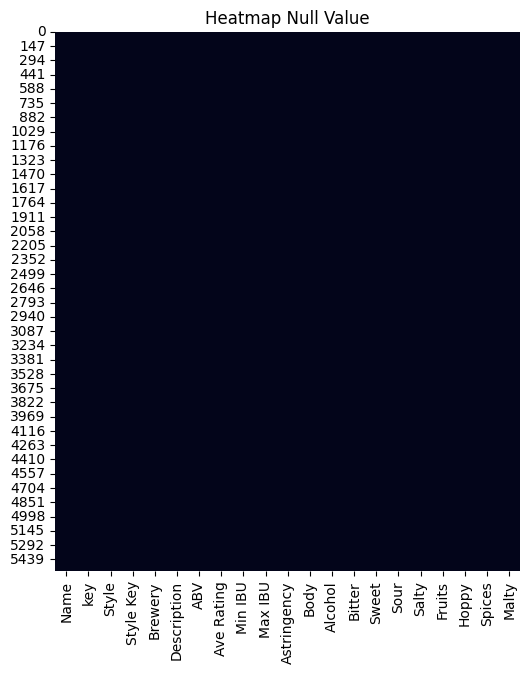

In [35]:
#   Repérer s'il y a des NULL et leur distribution / localisation
#   ---------------------------------------------------------------
plt.figure(figsize=FIGSIZE)         # Fonction figure > declarer figure dans laquelle je vais travailler
plt.title('Heatmap Null Value')     #   Titre de la figure
sns.heatmap(rawdata.isna(),cbar=False)      # Utilise graphique heatmap de seaborn dans matlpotlib / 
                                            #   isna nous dnne un masque boleen
plt.show()

No NULL values in beer profiles and ratings

In [36]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

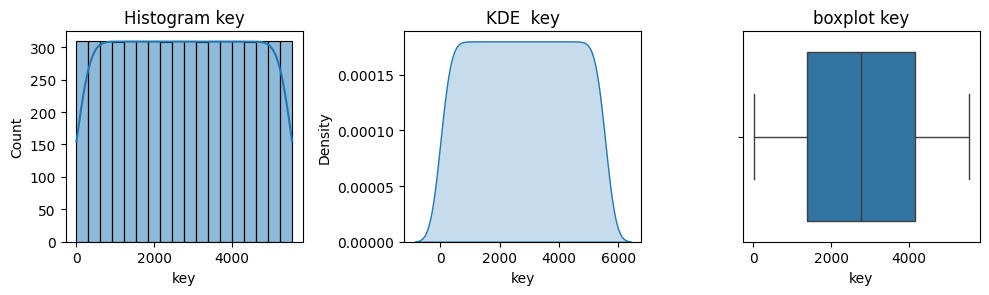

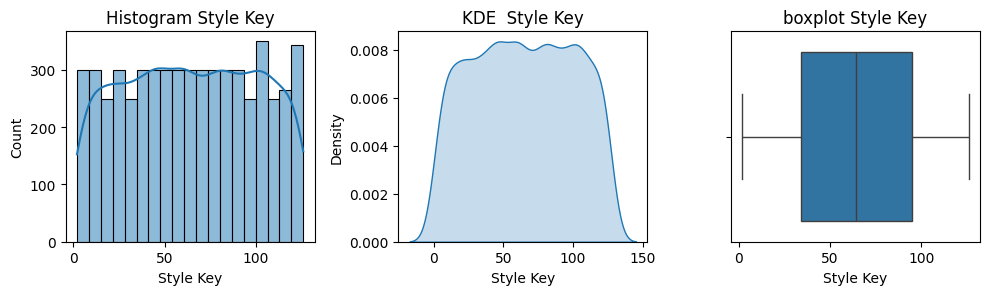

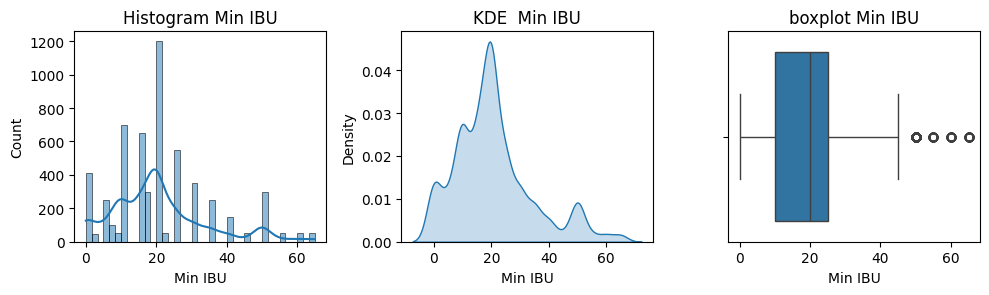

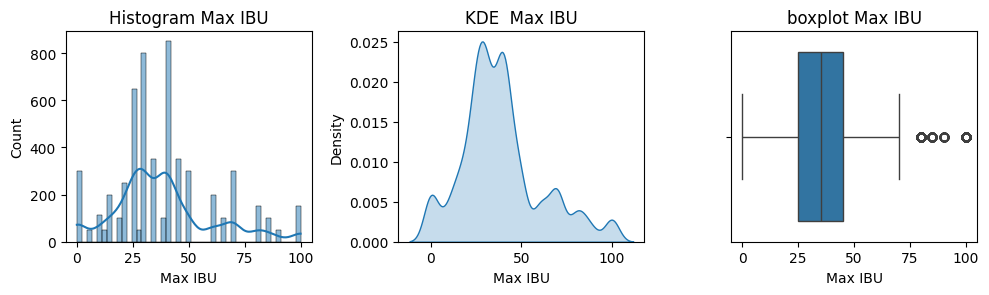

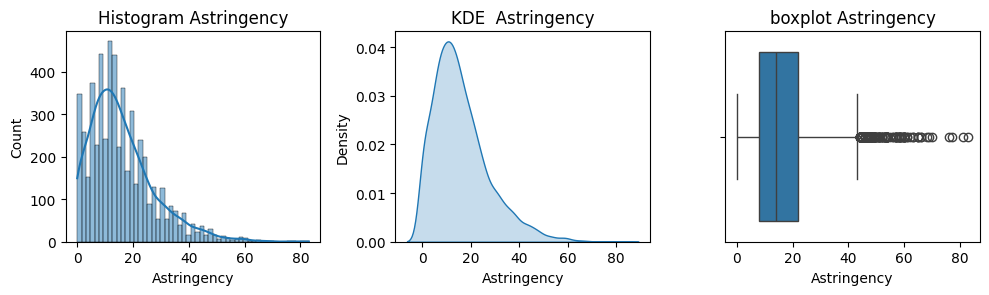

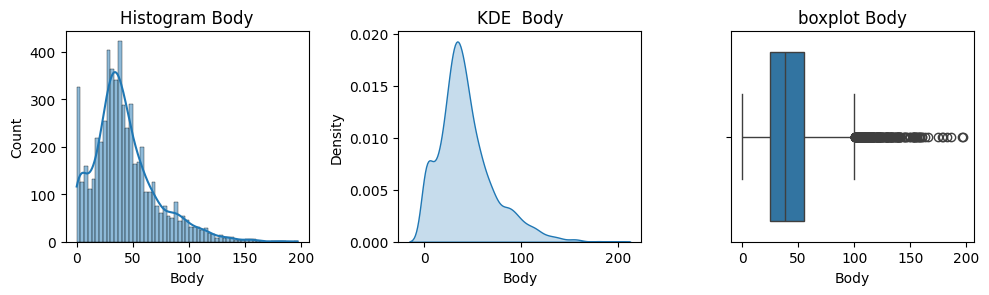

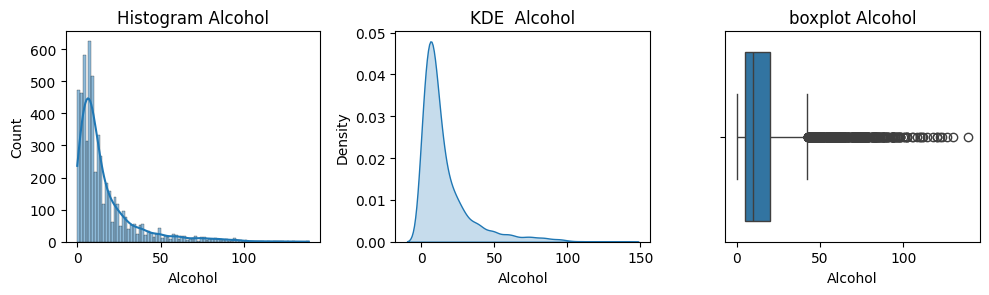

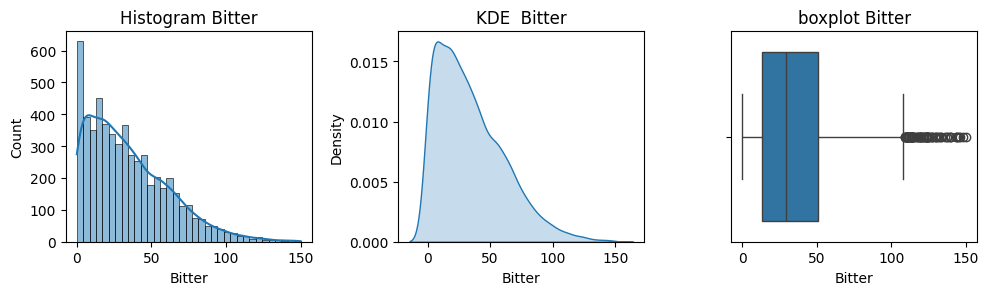

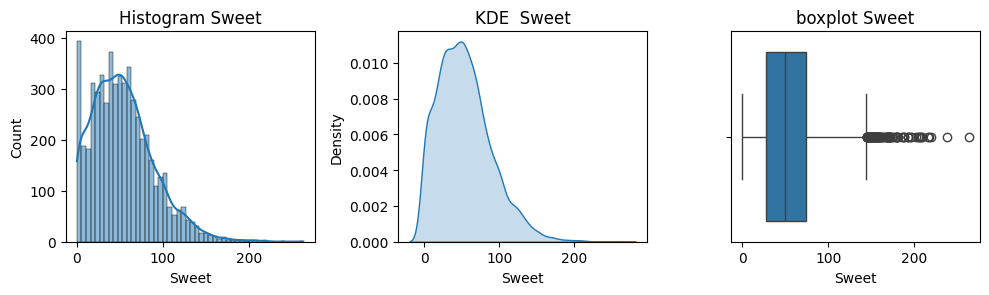

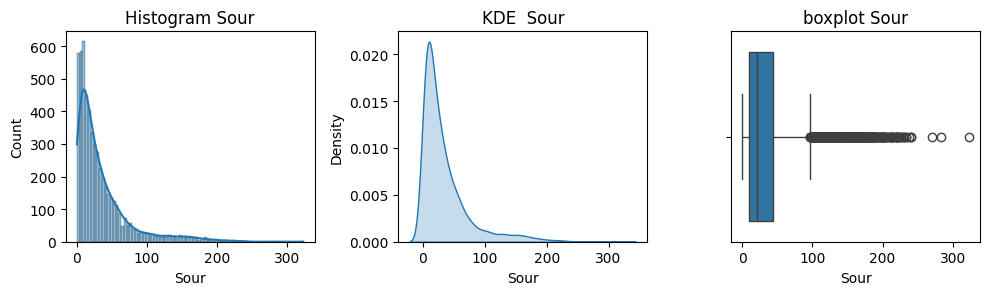

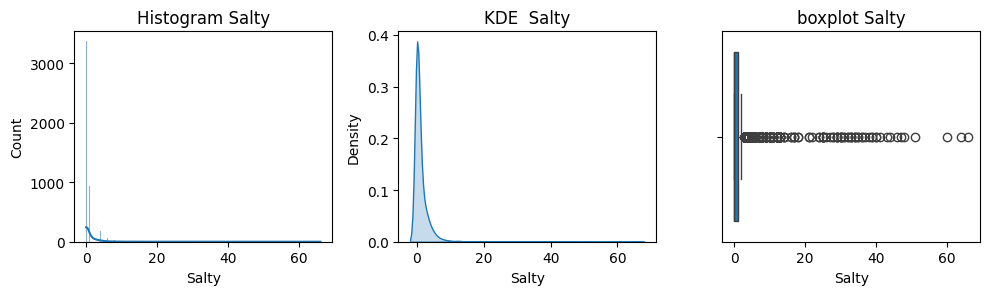

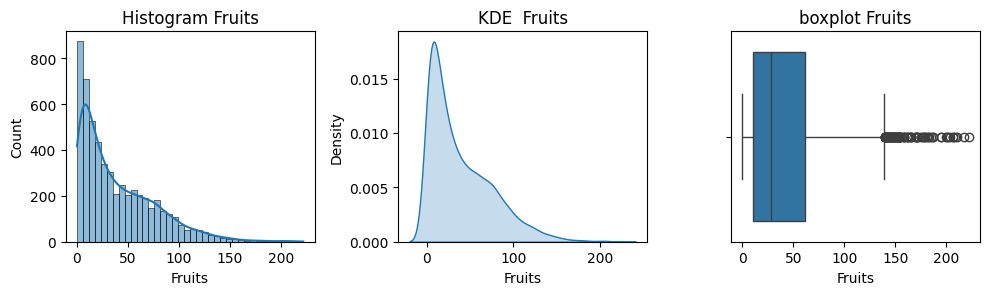

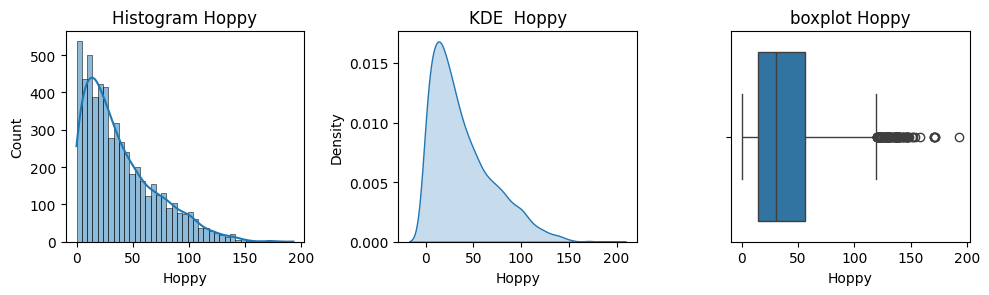

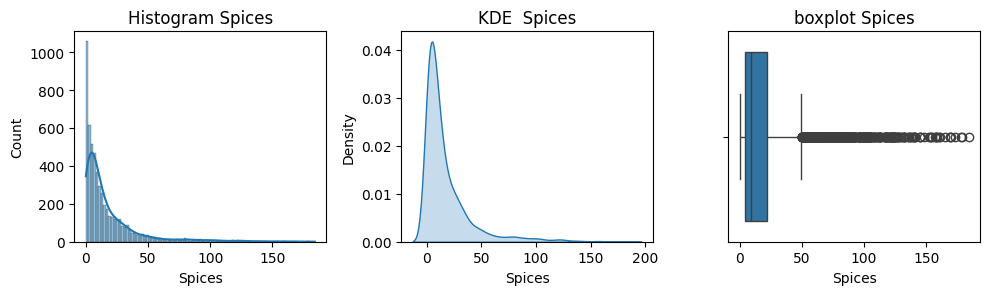

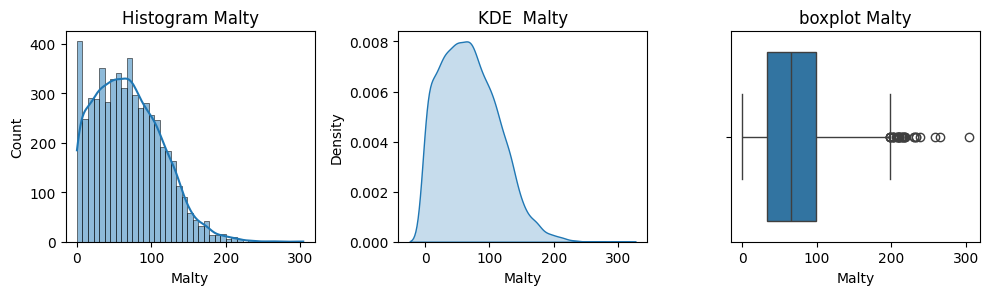

In [ ]:
#   Etude uni-variée des différentes colonnes - schemas différents
#   -----------------------------------------------------------------
        #   Faire des boucles pour avoir graphes pour les différentes colonnes du dataset
        #   Graphes sur variables continues
#   -----------------------------------------------------------------------------------

X_continuous = rawdata[['Body','Bitter','Alcohol']] 

for i, col in enumerate(cont_int_features):
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,1)
    plt.title(f'Histogram {col}')
    sns.histplot(data=rawdata, x=col,kde=True)  
    plt.subplot(3,3,2)
    plt.title(f'KDE  {col}')
    sns.kdeplot(data=rawdata, x=col,fill=True) 
    plt.subplot(3,3,3)
    plt.title(f'boxplot {col}')
    sns.boxplot(data=rawdata, x=col,fill=True) 
    plt.tight_layout()                              

plt.show() 

Distributions 
plutot vers la gauche 
Beaucoup d'outliers superieurs

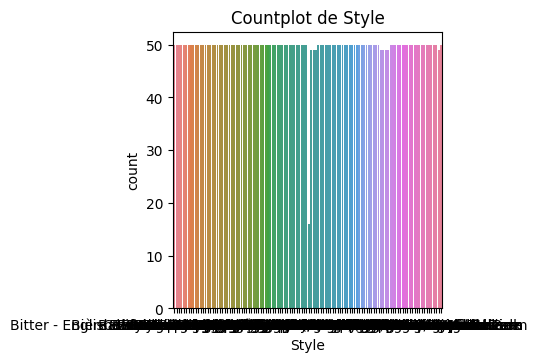

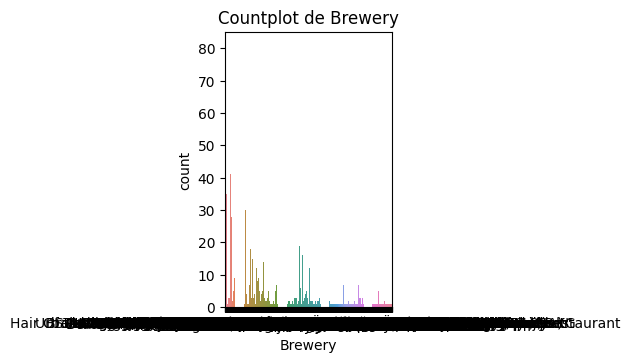

In [7]:
#   Graphes sur variables catégorielles > distribution
#   -----------------------------------------------------

X_discrete = rawdata[['Style','Brewery']] 
 
for i, col in enumerate(X_discrete):                     
    plt.figure(figsize=(12,10))
    plt.subplot(3,3,1)
    plt.title(f'Countplot de {col}')
    sns.countplot(data=rawdata,x=col,hue=col)
    plt.tight_layout() 
    plt.show() 



Beaucoup de styles, de labels (Name) et de breweries - a moins d' avoir des regroupements, peu lisible

In [ ]:
rawdata.count()

1000 records